In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
allergy_alerts = pd.read_csv('Core_data-Q1_Allergies/allergy_alerts_jan_2016_to_dec_2018.csv')
allergy_alerts.head()

,DescriptionOfIncident,ActionTaken,RiskToConsumers,LinkToNotice,IssuedDate
0,Fruit chutney - undeclared mustard in product.,Recalled,Possible adverse effects to allergy sufferers.,http://www.food.gov.uk/news-updates/news/2016/...,06/01/2016
1,After Dinner Mints - undeclared milk in product.,Withdrawn,Possible adverse effects to allergy sufferers.,http://www.food.gov.uk/news-updates/news/2016/...,08/01/2016
2,Chicken breasts with spicy sauce - undeclared ...,Recalled,Possible adverse effects to allergy sufferers.,http://www.food.gov.uk/news-updates/news/2016/...,21/01/2016
3,Pickling spice - undeclared mustard seeds in p...,Recalled,Possible adverse effects to allergy sufferers.,http://www.food.gov.uk/news-updates/news/2016/...,28/01/2016
4,Bread crumbs - ingredients not listed on the p...,Withdrawn,Possible adverse effects to allergy sufferers.,http://www.food.gov.uk/news-updates/news/2016/...,04/02/2016


In [3]:
food_and_you = pd.read_csv('Core_data-Q1_Allergies/food_and_you_wave_5.csv')
food_and_you.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (91) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,serialno,age_dv,age_dv2,RespSex,marstat2,famtype,bhhsize,bhhsize2,below16,below6,...,Label,FdAuthAct_MC1,FdAuthAct_MC2,FdAuthAct_MC3,FdAuthAct_MC4,FdAuthAct_MC5,FdAuthAct_MC6,FdAuthAct_MC7,FdAuthAct_MC8,FdAuthAct_MC9
0,5110101,45-54,45-54,Female,Married/Civil Partnership/Living with Partner,"Married, with kids",Three,Three,Yes,No,...,Always,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5110102,65-74,65-74,Male,Married/Civil Partnership/Living with Partner,"Married, no kids",Two,Two,No,No,...,Most of the time,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Mentioned
2,5110104,45-54,45-54,Female,Married/Civil Partnership/Living with Partner,"Married, with kids",Four,Four or more,Yes,No,...,Most of the time,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Mentioned
3,5110105,45-54,45-54,Female,Married/Civil Partnership/Living with Partner,"Married, no kids",Three,Three,No,No,...,Most of the time,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Mentioned
4,5110106,55-64,55-64,Female,Married/Civil Partnership/Living with Partner,"Married, no kids",Two,Two,No,No,...,Most of the time,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Mentioned,Not mentioned


In [4]:
food_and_you.columns

Index(['serialno', 'age_dv', 'age_dv2', 'RespSex', 'marstat2', 'famtype',
       'bhhsize', 'bhhsize2', 'below16', 'below6',
       ...
       'Label', 'FdAuthAct_MC1', 'FdAuthAct_MC2', 'FdAuthAct_MC3',
       'FdAuthAct_MC4', 'FdAuthAct_MC5', 'FdAuthAct_MC6', 'FdAuthAct_MC7',
       'FdAuthAct_MC8', 'FdAuthAct_MC9'],
      dtype='object', length=653)

In [5]:
food_and_you_key = food_and_you[['AdReac','AvoidFd','reacalle','reacint','reaccoe','reacnoc','reacglu','reaclac','reaccow','reacfpi','reacoth','reacno','clinaller','clinint','age_dv','age_dv2','Q2_19','Q6_1','Q6_2_W5','ons_lifesat','ons_worthw','ons_happy','ons_anxiety']]

In [6]:
food_and_you_key.head()

,AdReac,AvoidFd,reacalle,reacint,reaccoe,reacnoc,reacglu,reaclac,reaccow,reacfpi,...,clinint,age_dv,age_dv2,Q2_19,Q6_1,Q6_2_W5,ons_lifesat,ons_worthw,ons_happy,ons_anxiety
0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45-54,45-54,No,Good,No,High,High,High,Low
1,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,65-74,65-74,No,Fair,Yes,Very High,Very High,Very High,Very low
2,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45-54,45-54,No,Very good,No,Medium,Medium,Medium,Very low
3,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,45-54,45-54,No,Good,No,Medium,High,Low,High
4,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,55-64,55-64,No,Very good,No,Very High,Very High,Very High,Very low


In [7]:
food_and_you_key.count()

AdReac         3066
AvoidFd        3068
reacalle        694
reacint         695
reaccoe         694
reacnoc         694
reacglu         694
reaclac         695
reaccow         694
reacfpi         694
reacoth         696
reacno         3060
clinaller       151
clinint         372
age_dv         3060
age_dv2        3060
Q2_19          2090
Q6_1           3060
Q6_2_W5        3057
ons_lifesat    3036
ons_worthw     3029
ons_happy      3036
ons_anxiety    3032
dtype: int64

In [8]:
food_and_you_broad = food_and_you_key[['AdReac','AvoidFd','age_dv','Q6_1','ons_lifesat','ons_worthw','ons_happy','ons_anxiety']]

In [9]:
food_and_you_broad.head()

,AdReac,AvoidFd,age_dv,Q6_1,ons_lifesat,ons_worthw,ons_happy,ons_anxiety
0,No,No,45-54,Good,High,High,High,Low
1,No,No,65-74,Fair,Very High,Very High,Very High,Very low
2,No,No,45-54,Very good,Medium,Medium,Medium,Very low
3,No,No,45-54,Good,Medium,High,Low,High
4,No,No,55-64,Very good,Very High,Very High,Very High,Very low


In [10]:
food_and_you_broad.isna().sum()

AdReac          3
AvoidFd         1
age_dv          9
Q6_1            9
ons_lifesat    33
ons_worthw     40
ons_happy      33
ons_anxiety    37
dtype: int64

In [11]:
food_and_you_broad.shape

(3069, 8)

In [12]:
food_and_you_broad = food_and_you_broad.dropna()

In [13]:
# Dropped 60 rows
food_and_you_broad.shape

(3009, 8)

In [14]:
food_and_you_broad.head()

,AdReac,AvoidFd,age_dv,Q6_1,ons_lifesat,ons_worthw,ons_happy,ons_anxiety
0,No,No,45-54,Good,High,High,High,Low
1,No,No,65-74,Fair,Very High,Very High,Very High,Very low
2,No,No,45-54,Very good,Medium,Medium,Medium,Very low
3,No,No,45-54,Good,Medium,High,Low,High
4,No,No,55-64,Very good,Very High,Very High,Very High,Very low


In [15]:
le = LabelEncoder()

In [16]:
food_and_you_broad[['AdReac','AvoidFd','age_dv']] = food_and_you_broad[['AdReac','AvoidFd','age_dv']].apply(lambda col: le.fit_transform(col))

In [17]:
food_and_you_broad.head()

,AdReac,AvoidFd,age_dv,Q6_1,ons_lifesat,ons_worthw,ons_happy,ons_anxiety
0,0,0,3,Good,High,High,High,Low
1,0,0,5,Fair,Very High,Very High,Very High,Very low
2,0,0,3,Very good,Medium,Medium,Medium,Very low
3,0,0,3,Good,Medium,High,Low,High
4,0,0,4,Very good,Very High,Very High,Very High,Very low


In [18]:
# 0-9
Q6_1_dict = {'Good':6, 'Fair':4, 'Very good':9, 'Very bad':0, 'Bad':1}

In [19]:
# 0-9
ons_well_dict = {'Low':1, 'Medium':4, 'High':6, 'Very High':9}

In [20]:
ons_anxiety_dict = {'Very low':1, 'Low':4, 'Medium':6, 'High':9}

In [21]:
#Combine the well being questions into one feature and make a dict

In [22]:
food_and_you_broad['Q6_1'] = food_and_you_broad['Q6_1'].map(Q6_1_dict)

In [23]:
food_and_you_broad['ons_anxiety'] = food_and_you_broad['ons_anxiety'].map(ons_anxiety_dict)

In [24]:
food_and_you_broad['ons_lifesat'] = food_and_you_broad['ons_lifesat'].map(ons_well_dict)

In [25]:
food_and_you_broad['ons_worthw'] = food_and_you_broad['ons_worthw'].map(ons_well_dict)

In [26]:
food_and_you_broad['ons_happy'] = food_and_you_broad['ons_happy'].map(ons_well_dict)

In [27]:
food_and_you_broad.head()

,AdReac,AvoidFd,age_dv,Q6_1,ons_lifesat,ons_worthw,ons_happy,ons_anxiety
0,0,0,3,6,6,6,6,4
1,0,0,5,4,9,9,9,1
2,0,0,3,9,4,4,4,1
3,0,0,3,6,4,6,1,9
4,0,0,4,9,9,9,9,1


In [28]:
corr_food_and_you_broad = food_and_you_broad.corr()

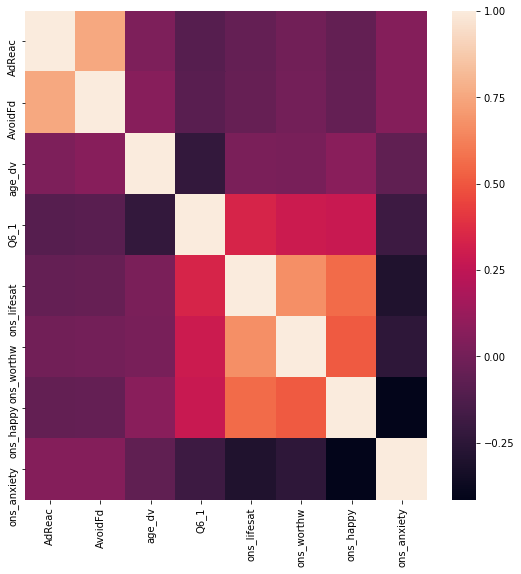

In [29]:
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr_food_and_you_broad)

In [30]:
food_and_you_broad['well_being'] = (food_and_you_broad['ons_lifesat'] + food_and_you_broad['ons_worthw'] + food_and_you_broad['ons_happy'] - food_and_you_broad['ons_anxiety'])/4

In [31]:
food_and_you_broad.head()

,AdReac,AvoidFd,age_dv,Q6_1,ons_lifesat,ons_worthw,ons_happy,ons_anxiety,well_being
0,0,0,3,6,6,6,6,4,3.50
1,0,0,5,4,9,9,9,1,6.50
2,0,0,3,9,4,4,4,1,2.75
3,0,0,3,6,4,6,1,9,0.50
4,0,0,4,9,9,9,9,1,6.50


In [32]:
food_and_you_broad.well_being.unique()

array([ 3.5 ,  6.5 ,  2.75,  0.5 ,  3.  ,  2.  ,  4.25,  2.5 ,  3.75,
        5.75,  1.75,  5.  ,  0.  ,  4.5 ,  1.25,  1.  ,  5.25,  4.  ,
       -1.5 ,  3.25,  1.5 ,  0.75, -0.25,  2.25, -0.75])

In [33]:
food_and_you_filter = food_and_you_broad.drop(columns=['ons_lifesat','ons_worthw','ons_happy','ons_anxiety'])

In [34]:
food_and_you_filter.rename(columns={'Q6_1':'health'}, inplace=True)

In [35]:
food_and_you_filter.head()

,AdReac,AvoidFd,age_dv,health,well_being
0,0,0,3,6,3.50
1,0,0,5,4,6.50
2,0,0,3,9,2.75
3,0,0,3,6,0.50
4,0,0,4,9,6.50


In [36]:
corr_food_and_you_filter = food_and_you_filter.corr()

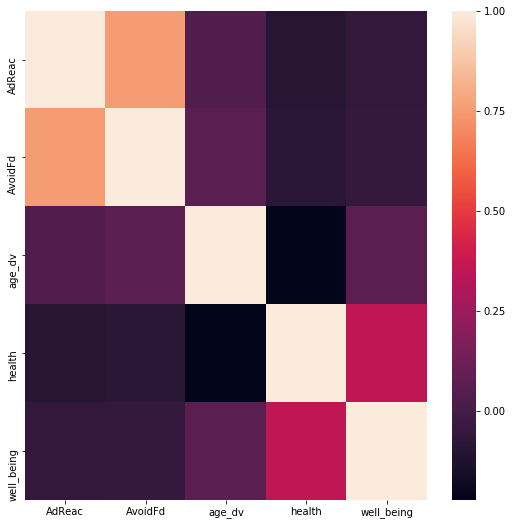

In [37]:
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr_food_and_you_filter)

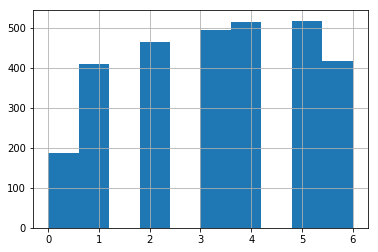

In [38]:
food_and_you_filter.age_dv.hist()

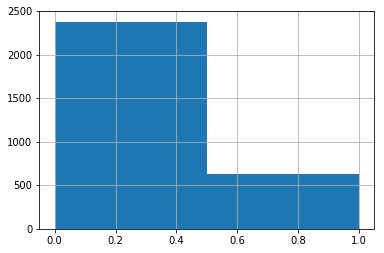

In [39]:
food_and_you_filter.AvoidFd.hist(bins=2)

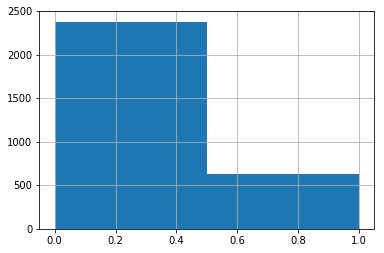

In [40]:
food_and_you_filter.AvoidFd.hist(bins=2)

In [41]:
food_and_you_broad['AdReac'].unique()

array([0, 1])

In [42]:
cat_col1 = food_and_you_broad['AdReac'].tolist()

## Specific allergies vs health and well-being

In [43]:
food_and_you.FdReac18.count()

699

In [44]:
food_and_you.IllAff96.count()

1174

In [45]:
#IllAff1-96

## Percentage allergies vs. health and well-being

In [46]:
food_and_you_new = food_and_you[['AdReac','Q6_1','ons_lifesat','ons_worthw','ons_happy','ons_anxiety']]

In [47]:
food_and_you_new.head()

,AdReac,Q6_1,ons_lifesat,ons_worthw,ons_happy,ons_anxiety
0,No,Good,High,High,High,Low
1,No,Fair,Very High,Very High,Very High,Very low
2,No,Very good,Medium,Medium,Medium,Very low
3,No,Good,Medium,High,Low,High
4,No,Very good,Very High,Very High,Very High,Very low


In [48]:
food_and_you_lifesat = food_and_you[['AdReac','ons_lifesat']]

In [49]:
food_and_you_lifesat.head()

,AdReac,ons_lifesat
0,No,High
1,No,Very High
2,No,Medium
3,No,Medium
4,No,Very High


In [50]:
food_and_you_lifesat_group = food_and_you_lifesat.groupby(['ons_lifesat','AdReac']).size().to_frame('count').reset_index()

In [51]:
food_and_you_lifesat_group2 = food_and_you_lifesat.groupby(['AdReac','ons_lifesat']).size().to_frame('count').reset_index()

In [52]:
food_and_you_lifesat_group2

,AdReac,ons_lifesat,count
0,No,High,1143
1,No,Low,113
2,No,Medium,310
3,No,Very High,947
4,Yes,High,237
5,Yes,Low,33
6,Yes,Medium,80
7,Yes,Very High,172


In [53]:
food_and_you_lifesat_group['percent'] = [82.82608695652173,17.17391304347826,77.3972602739726,22.602739726027394,79.48717948717949,20.51282051282051,84.62913315460231,15.370866845397677
]

In [54]:
food_and_you_lifesat_group

,ons_lifesat,AdReac,count,percent
0,High,No,1143,82.826087
1,High,Yes,237,17.173913
2,Low,No,113,77.397260
3,Low,Yes,33,22.602740
4,Medium,No,310,79.487179
5,Medium,Yes,80,20.512821
6,Very High,No,947,84.629133
7,Very High,Yes,172,15.370867


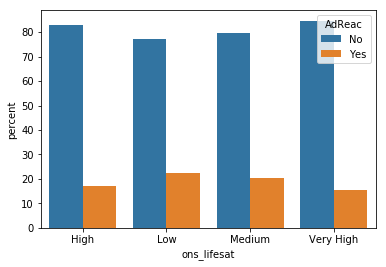

In [55]:
sns.barplot(x='ons_lifesat',y='percent',data=food_and_you_lifesat_group,hue='AdReac')

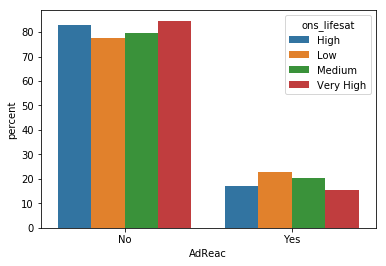

In [56]:
sns.barplot(x='AdReac',y='percent',data=food_and_you_lifesat_group,hue='ons_lifesat')

In [57]:
food_and_you_lifesat_group2['percent'] = [45.48,4.50,12.34,37.68,45.40,6.32,15.32,32.95]

In [58]:
food_and_you_lifesat_group2

,AdReac,ons_lifesat,count,percent
0,No,High,1143,45.48
1,No,Low,113,4.50
2,No,Medium,310,12.34
3,No,Very High,947,37.68
4,Yes,High,237,45.40
5,Yes,Low,33,6.32
6,Yes,Medium,80,15.32
7,Yes,Very High,172,32.95


Text(0, 0.5, 'Percentage of people with a hypersensitivity')

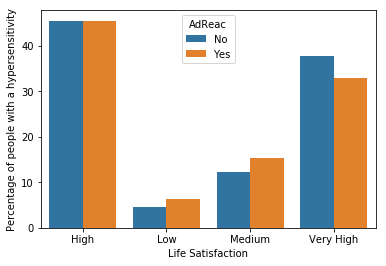

In [59]:
sns.barplot(x='ons_lifesat',y='percent',data=food_and_you_lifesat_group2,hue='AdReac')
plt.xlabel("Life Satisfaction")
plt.ylabel("Percentage of people with a hypersensitivity")
#fig1.set_axis_labels('Life Satisfaction','Percentage of people with a hypersensitivity')
#fig1.set(xlabel='Life_Satisfaction', ylabel='Percentage_of_people_with_a_hypersensitivity)

In [60]:
#food_and_you_lifesat_group = food_and_you_lifesat_group.pivot_table(index=['ons_lifesat'],columns='AdReac',values='count')

In [61]:
def barplot(feature):
    food_and_you_feature = food_and_you[['AdReac',feature]]
    food_and_you_feature_group2 = food_and_you_feature.groupby(['AdReac',feature]).size().to_frame('count').reset_index()
    return food_and_you_feature_group2

In [62]:
food_and_you_health_group = barplot('Q6_1')

In [63]:
food_and_you_health_group

,AdReac,Q6_1,count
0,No,Bad,118
1,No,Fair,457
2,No,Good,1039
3,No,Very bad,36
4,No,Very good,882
5,Yes,Bad,37
6,Yes,Fair,129
7,Yes,Good,220
8,Yes,Very bad,10
9,Yes,Very good,129


In [64]:
food_and_you_health_group['percent'] = [4.66,18.05,41.03,1.42,34.83,7.05,24.57,41.90,1.90,24.57]

Text(0, 0.5, 'Percentage of people with a hypersensitivity')

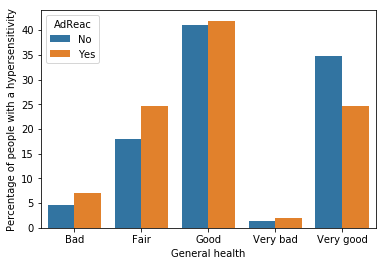

In [65]:
sns.barplot(x='Q6_1',y='percent',data=food_and_you_health_group,hue='AdReac')
plt.xlabel("General health")
plt.ylabel("Percentage of people with a hypersensitivity")

In [66]:
food_and_you_health_agg = food_and_you_health_group.groupby('Q6_1').agg({'count':'sum'})

In [67]:
food_and_you_health_agg

,count
Q6_1,
Bad,155
Fair,586
Good,1259
Very bad,46
Very good,1011


In [68]:
food_and_you_health_agg.to_dict()

{'count': {'Bad': 155,
  'Fair': 586,
  'Good': 1259,
  'Very bad': 46,
  'Very good': 1011}}

In [69]:
food_and_you_worth_group = barplot('ons_worthw')

In [70]:
food_and_you_worth_group

,AdReac,ons_worthw,count
0,No,High,1115
1,No,Low,84
2,No,Medium,247
3,No,Very High,1060
4,Yes,High,221
5,Yes,Low,20
6,Yes,Medium,58
7,Yes,Very High,223


In [71]:
food_and_you_worth_group['percent'] = [44.49,3.35,9.85,42.30,42.33,3.83,11.11,42.72]

Text(0, 0.5, 'Percentage of people with a hypersensitivity')

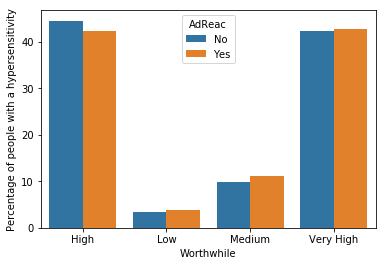

In [85]:
sns.barplot(x='ons_worthw',y='percent',data=food_and_you_worth_group,hue='AdReac')
plt.xlabel("Worthwhile")
plt.ylabel("Percentage of people with a hypersensitivity")

In [73]:
food_and_you_happy_group = barplot('ons_happy')

In [74]:
food_and_you_happy_group

,AdReac,ons_happy,count
0,No,High,974
1,No,Low,172
2,No,Medium,317
3,No,Very High,1051
4,Yes,High,193
5,Yes,Low,55
6,Yes,Medium,72
7,Yes,Very High,200


In [75]:
food_and_you_happy_group['percent'] = [38.74,6.84,12.6,41.8,37.12,10.58,13.85,38.46]

Text(0, 0.5, 'Percentage of people with a hypersensitivity')

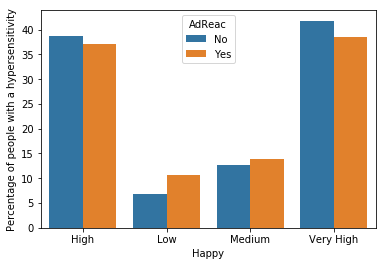

In [76]:
sns.barplot(x='ons_happy',y='percent',data=food_and_you_happy_group,hue='AdReac')
plt.xlabel("Happy")
plt.ylabel("Percentage of people with a hypersensitivity")

In [77]:
food_and_you_anxiety_group = barplot('ons_anxiety')

In [78]:
food_and_you_anxiety_group

,AdReac,ons_anxiety,count
0,No,High,479
1,No,Low,503
2,No,Medium,340
3,No,Very low,1188
4,Yes,High,126
5,Yes,Low,105
6,Yes,Medium,79
7,Yes,Very low,211


In [79]:
food_and_you_anxiety_group['percent'] = [19.08,20.04,13.55,47.33,24.18,20.15,15.16,40.49]

Text(0, 0.5, 'Percentage of people with a hypersensitivity')

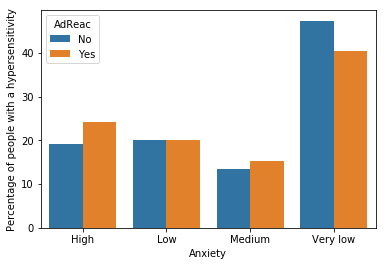

In [80]:
sns.barplot(x='ons_anxiety',y='percent',data=food_and_you_anxiety_group,hue='AdReac')
plt.xlabel("Anxiety")
plt.ylabel("Percentage of people with a hypersensitivity")

## Other data

In [81]:
#'Q6_4a','Q6_4b','Q6_4c','Q6_4d'

In [82]:
young_people = pd.read_csv('Core_data-Q1_Allergies/young-people-and-food-allergies-intolerances-2018.csv')
young_people.head()

,Respondent ID,Collector ID,How old are you?Response,Have you ever had a reaction after eating certain foods?Response,How would you best describe your problem with this/these food(s)?FoodAllergy,How would you best describe your problem with this/these food(s)?FoodIntolerance,How would you best describe your problem with this/these food(s)?CoeliacDisease,How would you best describe your problem with this/these food(s)?NonCoeliacGlutenSensitivity,How would you best describe your problem with this/these food(s)?Other,Has this condition been diagnosed?Response,...,WhenYouEatOutOrOrderATakeawayFoodOnlineWithoutSupportHowWorriedAreYouAboutAnyOfTheFollowing?AllergenInformationNotBeingEasyToFind,WhenYouEatOutOrOrderATakeawayFoodOnlineWithoutSupportHowWorriedAreYouAboutAnyOfTheFollowing?HavingToAskForAllergenInformation,AgainWhenEatingOutOrOrderingATakeawayFoodOnlineWithoutSupportWouldAnyOfTheFollowingHelpInTheManagementOfYourCondition?SeparateMenusForPeopleWithFoodAllergiesIntolerances,AgainWhenEatingOutOrOrderingATakeawayFoodOnlineWithoutSupportWouldAnyOfTheFollowingHelpInTheManagementOfYourCondition?AllergenInformationListedNextToDishesOnTheMenu,AgainWhenEatingOutOrOrderingATakeawayFoodOnlineWithoutSupportWouldAnyOfTheFollowingHelpInTheManagementOfYourCondition?SymbolsRepresentingAllergensListedNextToDishesOnTheMenu,AgainWhenEatingOutOrOrderingATakeawayFoodOnlineWithoutSupportWouldAnyOfTheFollowingHelpInTheManagementOfYourCondition?SignsEncouragingPeopleWithFoodAllergiesIntolerancesToAskForAllergenInformation,AgainWhenEatingOutOrOrderingATakeawayFoodOnlineWithoutSupportWouldAnyOfTheFollowingHelpInTheManagementOfYourCondition?WaitingStaffPro-ActivelyAskingIfAnyoneOnTheTableHasFoodAllergyOrIntoleranceNeedsWhenTakingYourReservationOrYourFoodOrder,AgainWhenEatingOutOrOrderingATakeawayFoodOnlineWithoutSupportWouldAnyOfTheFollowingHelpInTheManagementOfYourCondition?NoneOfTheAbove,ThinkingAboutYourMainResidenceWhereDoYouCurrentlyLive?Response,WhichBestDescribesYourCurrentStatus?Response
0,10135679567,213575351,16 - 18 years old,Yes,Food allergy,NaN,NaN,NaN,NaN,Yes,...,A little worried,Not at all worried,NaN,Allergen information listed next to dishes on ...,NaN,NaN,NaN,NaN,South East,Full time student/at school
1,10135285347,213575351,16 - 18 years old,Yes,Food allergy,NaN,NaN,NaN,NaN,Yes,...,A little worried,Not at all worried,NaN,Allergen information listed next to dishes on ...,Symbols representing allergens listed next to ...,NaN,Waiting staff pro-actively asking if anyone on...,NaN,London,Full time student/at school
2,10135219567,213575351,16 - 18 years old,Yes,Food allergy,NaN,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Midlands,Full time student/at school
3,10135156891,213575351,19 - 21 years old,Yes,Food allergy,NaN,NaN,NaN,NaN,Yes,...,Very worried,Not at all worried,Separate menus for people with food allergies/...,Allergen information listed next to dishes on ...,NaN,Signs encouraging people with food allergies/i...,Waiting staff pro-actively asking if anyone on...,NaN,East of England,Full time student/at school
4,10135132918,213575351,22 - 24 years old,Yes,Food allergy,NaN,NaN,NaN,NaN,Yes,...,Very worried,Not at all worried,NaN,Allergen information listed next to dishes on ...,Symbols representing allergens listed next to ...,NaN,Waiting staff pro-actively asking if anyone on...,NaN,London,Employed full-time


In [83]:
email_2017 = pd.read_csv('Core_data-Q1_Allergies/email-sms-subscribers2017.csv')
email_2017.head()

,SubscriptionName,TotalSubscriptionsToDate,NewSubscriptionsToDate,NewSubscriptionsThisPeriod,DeletedSubscriptionsToDate,DeletedSubscriptionsThisPeriod,BulletinsSentThisPeriod,TotalBulletinsSentToDate
0,News,13126,37985,0,24859,906,5,598
1,Cylchlythyr Rheoleiddio ein Dyfodol (Cymraeg) ...,2484,3273,2849,789,719,7,10
2,Regulating our Future newsletter,3983,4770,3845,787,707,7,9
3,Lupin SMS,23932,45694,38044,21762,14865,1,3
4,Soya SMS,23960,45554,38022,21594,14845,18,37


In [84]:
email_2018 = pd.read_csv('Core_data-Q1_Allergies/email-sms-subscribers2018.csv')
email_2018.head()

,SubscriptionID,Name,NumberSubscribersSince31March2019
0,0,All subscribers,34095
1,0,Users with at least one allergy alert subscrip...,20105
2,62,Nuts,17336
3,63,Fish,16340
4,64,Milk,17236
